# AIML Computer Vision Case Study



## Objective
The goal of this case study is to train, evaluate, and compare CNN architectures for image classification on the CIFAR-100 dataset(link = "https://www.cs.toronto.edu/~kriz/cifar.html").

In [13]:
!tar -xvzf cifar-100-python.tar.gz

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [14]:
import pickle
import numpy as np

In [15]:
with open("cifar-100-python/train",'rb') as f:
  train_data = pickle.load(f,encoding = 'bytes')


In [16]:
X_train = train_data[b"data"]
y_train = train_data[b"fine_labels"]

In [17]:
with open("cifar-100-python/test",'rb') as f:
  test_data = pickle.load(f,encoding='bytes')

In [18]:
X_test  = test_data[b"data"]
y_test = test_data[b'fine_labels']

In [19]:
X_train = X_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
y_train = np.array(y_train)
X_test = X_test.reshape(-1,3,32,32).transpose(0,2,3,1)
y_test = np.array(y_test)


In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [21]:
from tensorflow.keras.utils import to_categorical,plot_model
X_train= X_train.astype("float32")/255.0
X_test= X_test.astype("float32")/255.0


y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

In [13]:
datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=64)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [15]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model.keras', monitor='val_accuracy', save_best_only=True)

In [17]:
model = create_cnn_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
history = model.fit(
    train_gen,
    validation_data=(X_test, y_test),
    epochs=35,
    steps_per_epoch=X_train.shape[0] // 64,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 60s 60ms/step - accuracy: 0.0723 - loss: 4.5734 - val_accuracy: 0.1878 - val_loss: 3.4564
Epoch 2/35
  1/781 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.2188 - loss: 3.6591

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2188 - loss: 3.6591 - val_accuracy: 0.1888 - val_loss: 3.4510
Epoch 3/35
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.1955 - loss: 3.3870 - val_accuracy: 0.2392 - val_loss: 3.1838
Epoch 4/35
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2656 - loss: 2.7976 - val_accuracy: 0.2386 - val_loss: 3.1885
Epoch 5/35
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.2702 - loss: 2.9157 - val_accuracy: 0.3527 - val_loss: 2.4855
Epoch 6/35
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3438 - loss: 2.9135 - val_accuracy: 0.3503 - val_loss: 2.4877
Epoch 7/35
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.3239 - loss: 2.6362 - val_accuracy: 0.3745 - val_loss: 2.4754
Epoch 8/35
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3281 - loss: 2.7033 - val_accuracy: 0.3760 - val_loss: 2.4597
Epoch 9/35
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.3556 - loss: 2.4820 - val_accuracy: 0.411

In [19]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5507 - loss: 1.6344
Test Accuracy: 55.84%


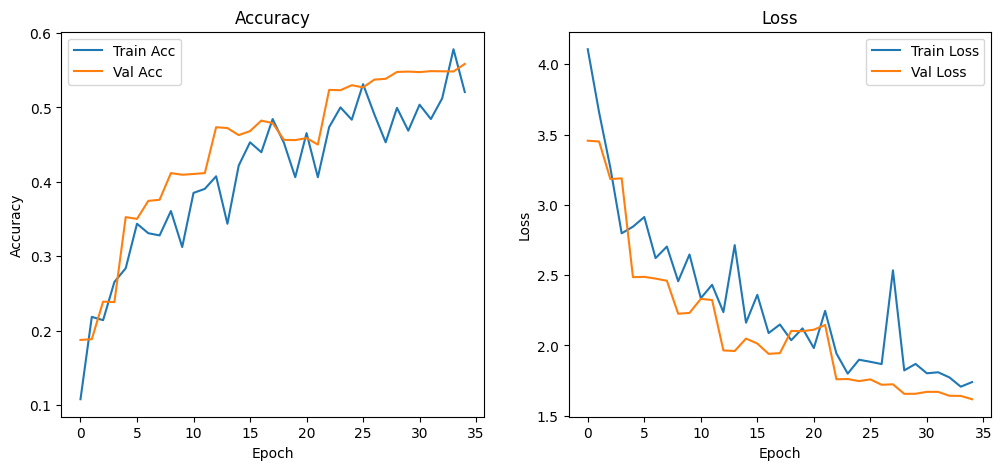

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,169,870 (15.91 MB)

 Trainable params: 1,389,316 (5.30 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 2,778,634 (10.60 MB)

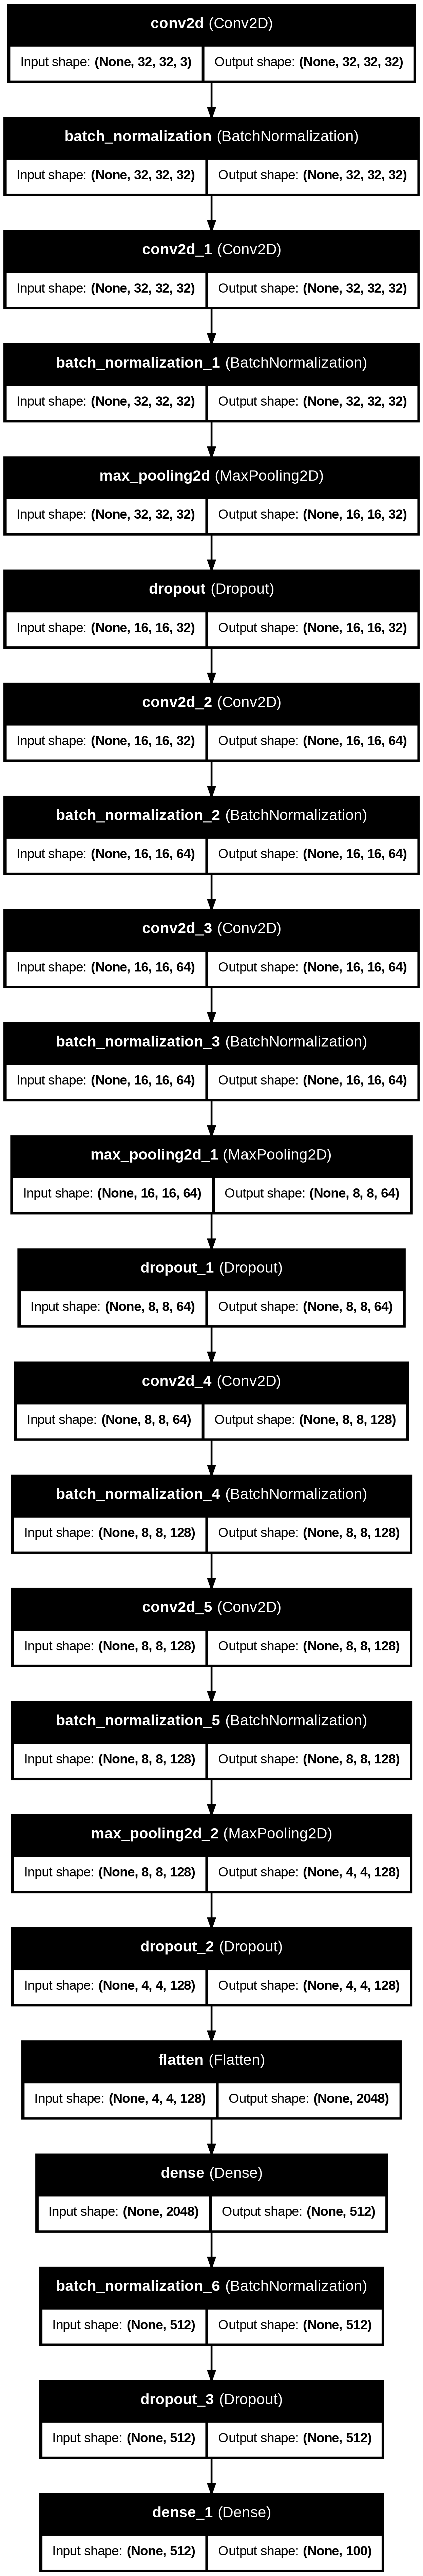

In [21]:
model.summary()
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


## VGG

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [17]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

In [18]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [19]:
batch_size = 64

def preprocess(img, label):
    img = tf.cast(img, tf.float32) / 255.0
    img = data_augmentation(img)
    return img, label

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(5000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(lambda img, label: (tf.cast(img, tf.float32)/255.0, label))
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

In [22]:
def custom_vgg16_cifar(input_shape=(32,32,3), num_classes=100):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3,3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(256, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(512, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(512, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model1 = Model(inputs, outputs)
    return model1

In [24]:
model1= custom_vgg16_cifar()
model1.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,80

 Total params: 34,023,844 (129.79 MB)

 Trainable params: 34,015,396 (129.76 MB)

 Non-trainable params: 8,448 (33.00 KB)

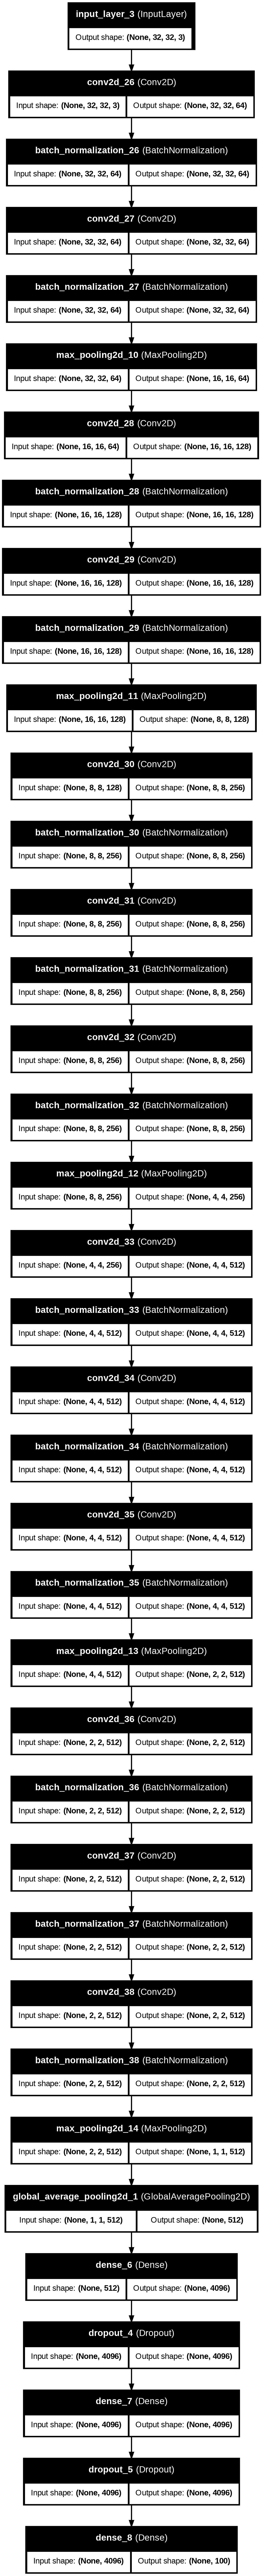

In [25]:
from tensorflow.keras.utils import to_categorical,plot_model
model1.summary()
plot_model(model1, to_file='vgg.png', show_shapes=True, show_layer_names=True)

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_vgg_model1.keras', monitor='val_accuracy', save_best_only=True)
]

In [30]:
hist1=model1.fit(train_ds, validation_data=test_ds, epochs=35, callbacks=callbacks)

Epoch 1/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.1023 - loss: 3.8107 - val_accuracy: 0.1314 - val_loss: 3.6412 - learning_rate: 0.0100
Epoch 2/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.1480 - loss: 3.5543 - val_accuracy: 0.1429 - val_loss: 3.6453 - learning_rate: 0.0100
Epoch 3/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - accuracy: 0.1843 - loss: 3.3337 - val_accuracy: 0.2242 - val_loss: 3.1273 - learning_rate: 0.0100
Epoch 4/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 99ms/step - accuracy: 0.2267 - loss: 3.1340 - val_accuracy: 0.2467 - val_loss: 3.0907 - learning_rate: 0.0100
Epoch 5/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.2561 - loss: 2.9704 - val_accuracy: 0.2690 - val_loss: 2.9729 - learning_rate: 0.0100
Epoch 6/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.2839 - loss: 2.8486 - val_accuracy: 0.2984 - val_loss: 2.8062 - learning_rate: 0.0100
Epoch 7/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.

In [35]:
loss1, acc1 = model1.evaluate(test_ds)
print(f"Test Accuracy: {acc1*100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5562 - loss: 1.8243
Test Accuracy: 55.59%


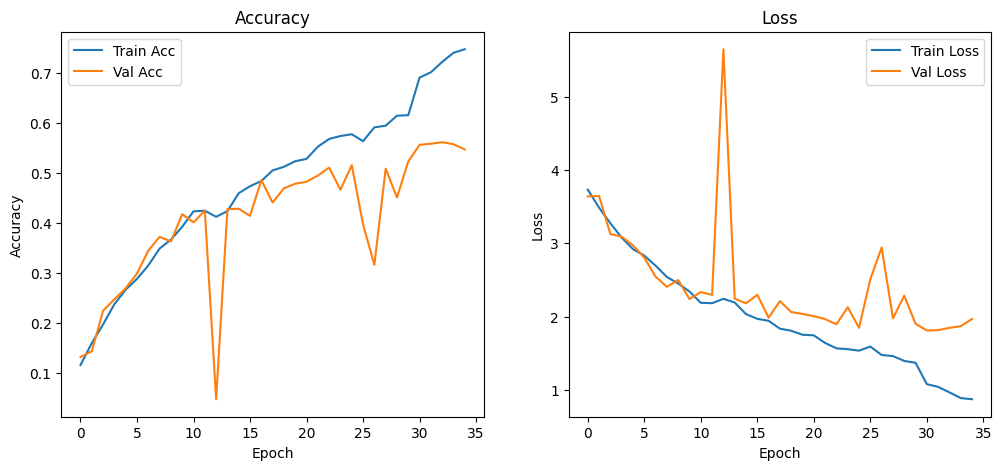

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist1.history['accuracy'], label='Train Acc')
plt.plot(hist1.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(hist1.history['loss'], label='Train Loss')
plt.plot(hist1.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [41]:
import pandas as pd
df = pd.DataFrame(columns = ['Model',"Accuracy"])
df.loc[0] = ['Custom','55.84']
df.loc[1] = ['Vgg',f"{acc1*100:.2f}"]
df

,Model,Accuracy
0,Custom,55.84
1,Vgg,55.59
